In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB  # For Gaussian Naive Bayes
from sklearn.naive_bayes import MultinomialNB  # For Multinomial Naive Bayes
from sklearn.naive_bayes import BernoulliNB  # For Bernoulli Naive Bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC 

newdata = pd.read_csv(r'amazon-meta.csv')  #importing data

data = newdata.drop(0) #deleting the first row cause of missing values

print(data.head())  #check data


clean_data = data.dropna(how='any')


if clean_data.empty:
  print("No data remaining after dropping NaNs. Consider imputation!")
else:
  print("Data cleaned!")
  data = clean_data



   Id        ASIN                                             title group  \
1   1  0827229534                             Patterns of Preaching  Book   
2   2  0738700797                                         Candlemas  Book   
3   3  0486287785  World War II Allied Fighter Planes Trading Cards  Book   
4   4  0842328327                 Life Application Bible Commentary  Book   
5   5  1577943082              Prayers That Avail Much for Business  Book   

   salesrank                                            similar  categories  \
1   396585.0  5  0804215715  156101074X  0687023955  0687074...         2.0   
2   168596.0  5  0738700827  1567184960  1567182836  0738700...         2.0   
3  1270652.0                                                  0         1.0   
4   631289.0  5  0842328130  0830818138  0842330313  0842328...         5.0   
5   455160.0  5  157794349X  0892749504  1577941829  0892749...         2.0   

   reviews_total  reviews_downloaded  reviews_avg_rating  
1  

In [64]:
data.describe()


,Id,salesrank,categories,reviews_total,reviews_downloaded,reviews_avg_rating
count,542682.000000,5.426820e+05,542682.000000,542682.000000,542682.000000,542682.000000
mean,274413.621010,4.893250e+05,4.624594,14.339851,13.992056,3.209529
std,158454.368912,5.677238e+05,4.450647,74.768505,71.908543,1.996297
min,1.000000,-1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,137161.250000,9.074250e+04,2.000000,0.000000,0.000000,0.000000
50%,274426.500000,3.004900e+05,4.000000,2.000000,2.000000,4.000000
75%,411673.750000,6.720702e+05,6.000000,8.000000,7.000000,5.000000
max,548551.000000,3.798351e+06,116.000000,5545.000000,4995.000000,5.000000


In [65]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 542682 entries, 1 to 548551
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  542682 non-null  int64  
 1   ASIN                542682 non-null  object 
 2   title               542682 non-null  object 
 3   group               542682 non-null  object 
 4   salesrank           542682 non-null  float64
 5   similar             542682 non-null  object 
 6   categories          542682 non-null  float64
 7   reviews_total       542682 non-null  float64
 8   reviews_downloaded  542682 non-null  float64
 9   reviews_avg_rating  542682 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 45.5+ MB


In [66]:
data['total_review_by_category'] = data.groupby('group')['reviews_total'].transform('sum')

In [67]:
data.head(10)


,Id,ASIN,title,group,salesrank,similar,categories,reviews_total,reviews_downloaded,reviews_avg_rating,total_review_by_category
1,1,0827229534,Patterns of Preaching,Book,396585.0,5 0804215715 156101074X 0687023955 0687074...,2.0,2.0,2.0,5.0,4707572.0
2,2,0738700797,Candlemas,Book,168596.0,5 0738700827 1567184960 1567182836 0738700...,2.0,12.0,12.0,4.5,4707572.0
3,3,0486287785,World War II Allied Fighter Planes Trading Cards,Book,1270652.0,0,1.0,1.0,1.0,5.0,4707572.0
4,4,0842328327,Life Application Bible Commentary,Book,631289.0,5 0842328130 0830818138 0842330313 0842328...,5.0,1.0,1.0,4.0,4707572.0
5,5,1577943082,Prayers That Avail Much for Business,Book,455160.0,5 157794349X 0892749504 1577941829 0892749...,2.0,0.0,0.0,0.0,4707572.0
6,6,0486220125,How the Other Half Lives,Book,188784.0,5 0486401960 0452283612 0486229076 0714840...,5.0,17.0,17.0,4.0,4707572.0
7,7,B00000AU3R,Batik,Music,5392.0,5 B00002616C B0000261KX B00006AM8D B000059...,3.0,3.0,3.0,4.5,1411619.0
8,8,0231118597,Losing Matt Shepard,Book,277409.0,5 B000067D0Y 0375727191 080148605X 1560232...,4.0,15.0,15.0,4.5,4707572.0
9,9,1859677800,Making Bread,Book,949166.0,0,1.0,0.0,0.0,0.0,4707572.0
10,10,0375709363,The Edward Said Reader,Book,220379.0,5 039474067X 0679730672 0679750541 1400030...,3.0,6.0,6.0,4.0,4707572.0


In [68]:
data['group'].head(20)

1      Book
2      Book
3      Book
4      Book
5      Book
6      Book
7     Music
8      Book
9      Book
10     Book
11     Book
12     Book
13     Book
14    Music
15     Book
16     Book
17     Book
18    Music
19     Book
20     Book
Name: group, dtype: object

In [ ]:
#selecting all the reviews for each group of items and putting in a graph to compare which group had the most reviews

#select total_reviews from all rows where group  == Book -> book
#select total_reviews from all rows where group == music -> music
#select total_reviews from all rows where group == DVD -> dvd

In [69]:
BookReviews =  data.loc[data['group'] ==  'Book', 'reviews_total']
BookMedian = BookReviews.median()
print(BookMedian)
BookReviews.head(20)
print(BookReviews)
# the current calculation shows the entries (top 20), where there is a review for book

2.0
1          2.0
2         12.0
3          1.0
4          1.0
5          0.0
          ... 
548541     1.0
548542     3.0
548543     5.0
548546     2.0
548549     1.0
Name: reviews_total, Length: 393559, dtype: float64


In [70]:
DVDReviews = data.loc[data['group'] == 'DVD', 'reviews_total']
DVDMedian = DVDReviews.median()
print(DVDMedian)
DVDReviews.head(20)
print(DVDReviews)
# the current calculation shows the entries (top 20), where there is a review for DVD

10.0
21        140.0
37          7.0
42         24.0
44         13.0
149         0.0
          ...  
548459    102.0
548460     31.0
548547      1.0
548548      8.0
548550      3.0
Name: reviews_total, Length: 19828, dtype: float64


In [71]:
MusicReviews = data.loc[data['group'] == 'Music', 'reviews_total']
MusicMedian = MusicReviews.median()
print(MusicMedian) #use as the Y axis in bar graph
MusicReviews.head(20)
print(MusicReviews)
# the current calculation shows the entries (top 20), where there is a review for Music


3.0
7          3.0
14         0.0
18        15.0
22         4.0
34         6.0
          ... 
548509     1.0
548536     3.0
548544     1.0
548545     1.0
548551     1.0
Name: reviews_total, Length: 103144, dtype: float64


In [73]:
VideoReview = data.loc[data['group'] == 'Video', 'reviews_total'] 
VideosMedian = VideoReview.median() 
print(VideosMedian)
VideoReview.head(20)
print(VideoReview)
# the current calculation shows the entries (top 20), where there is a review for a video
#Find the mean video review - so that I can plot them in a bar graph. 


6.0
59          5.0
71          2.0
81        167.0
84         14.0
124         2.0
          ...  
544010     13.0
548495     10.0
548499     18.0
548506     13.0
548526      1.0
Name: reviews_total, Length: 26131, dtype: float64


In [ ]:
#plotting a bar graph
categories = ['Music', 'DVD', 'Video', 'Book']
Review_categories = [MusicMedian, DVDMedian, VideosMedian, BookMedian]

colors = [(68/255, 69/255, 69/255), (181/255, 255/255, 233/255), (197/255, 224/255, 216/255), (201/255, 201/255, 201/255)]
plt.bar(categories, Review_categories, color=colors) #colours converted to rgb instead



plt.xlabel('Product Category')
plt.ylabel('Total number of Reviews per product')
plt.title('Total Review by product category')

In [ ]:
#the average rating of Books 
#the average rating of Video
#the average rating of DVD

#Compare them in a box plot

# for the classification models, we are trying to predict salesrank per group category. 

#Create a bar chart with the "group" values on the x-axis and the mean or median "salesrank" values for each group on the y-axis.
#to do that, first find out if there are any extreme outliers for the categories in terms of sales rank. - choose between mean or median





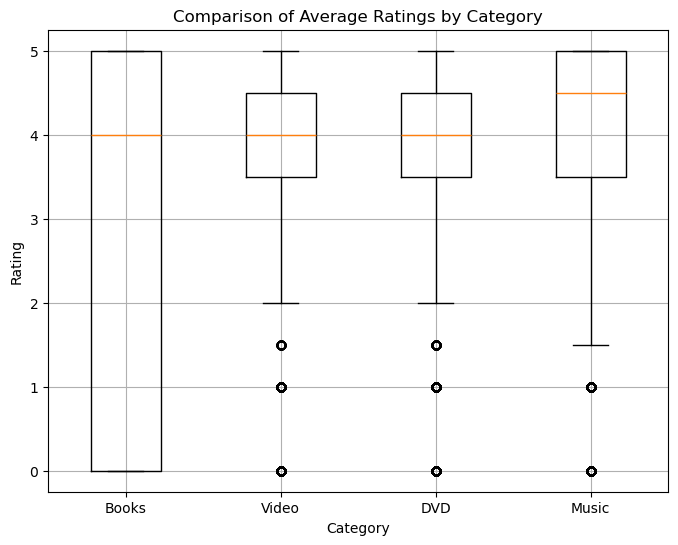

In [75]:
plt.figure(figsize=(8, 6))
plt.boxplot([data[data['group'] == 'Book']['reviews_avg_rating'],
             data[data['group'] == 'Video']['reviews_avg_rating'],
             data[data['group'] == 'DVD']['reviews_avg_rating'],
             data[data['group'] == 'Music']['reviews_avg_rating']],
            labels=['Books', 'Video', 'DVD','Music'])
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Comparison of Average Ratings by Category')
plt.grid(True)
plt.show()

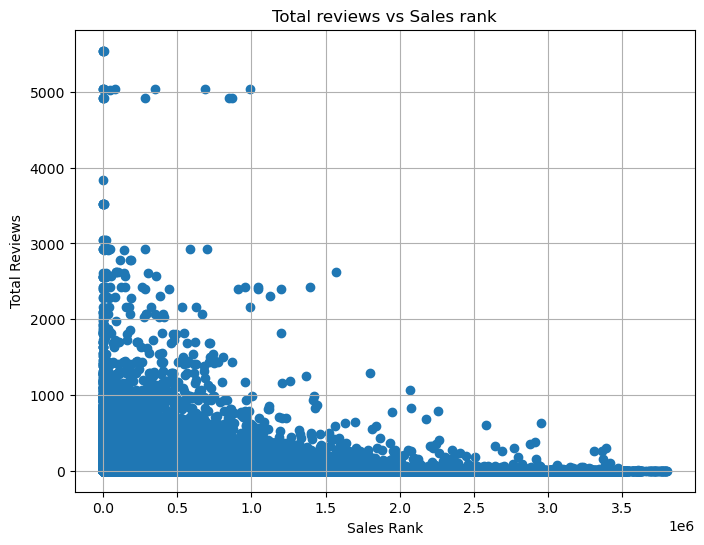

In [37]:
# a scatter plot to find out if there is a correlation between the salesrank and total reviews or average reviews

plt.figure(figsize=(8, 6))
plt.scatter(data['salesrank'], data['reviews_total'])
plt.xlabel('Sales Rank')
plt.ylabel('Total Reviews')
plt.title('Total reviews vs Sales rank')
plt.grid(True)
plt.show()


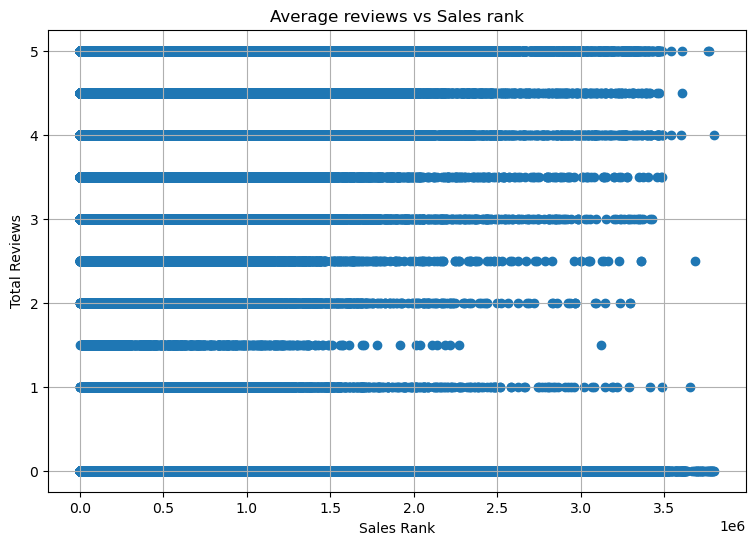

In [3]:
plt.figure(figsize=(9, 6))
plt.scatter(data['salesrank'], data['reviews_avg_rating'])
plt.xlabel('Sales Rank')
plt.ylabel('Total Reviews')
plt.title('Average reviews vs Sales rank')
plt.grid(True)
plt.show()
#figure out whats wrong with the graph below. 

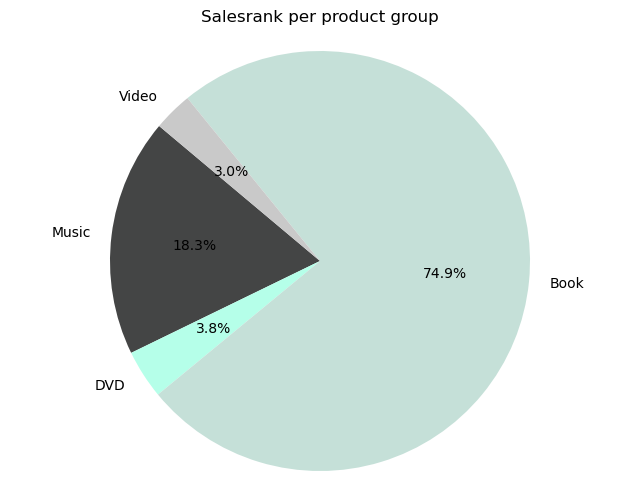

In [78]:
#picking only the categories with the biggest num of products
Music_mean_rank = 154302.87
Video_mean_rank = 31713.50
Book_mean_rank = 630906.88
DVD_mean_rank = 25399.30

category_Avg_rank = [Music_mean_rank, Video_mean_rank, Book_mean_rank, DVD_mean_rank]
category_names = ['Music', 'DVD', 'Book', 'Video']
colors =  [(68/255, 69/255, 69/255), (181/255, 255/255, 233/255), (197/255, 224/255, 216/255), (201/255, 201/255, 201/255)]

plt.figure(figsize=(8, 6))
plt.pie(category_Avg_rank, labels=category_names, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Salesrank per product group')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [77]:
#find which group had the highest salesrank 
#group salesrank by category and find its mean, median or sum
#identify the group with the highest rank 

group_sales_rank = data.groupby('group')['salesrank'].mean()
print(group_sales_rank)

group
Baby Product      1017.000000
Book            630908.620131
CE               66277.500000
DVD              25399.302098
Music           154302.865867
Software          2016.200000
Sports            4684.000000
Toy              12921.375000
Video            31713.505185
Video Games        339.000000
Name: salesrank, dtype: float64


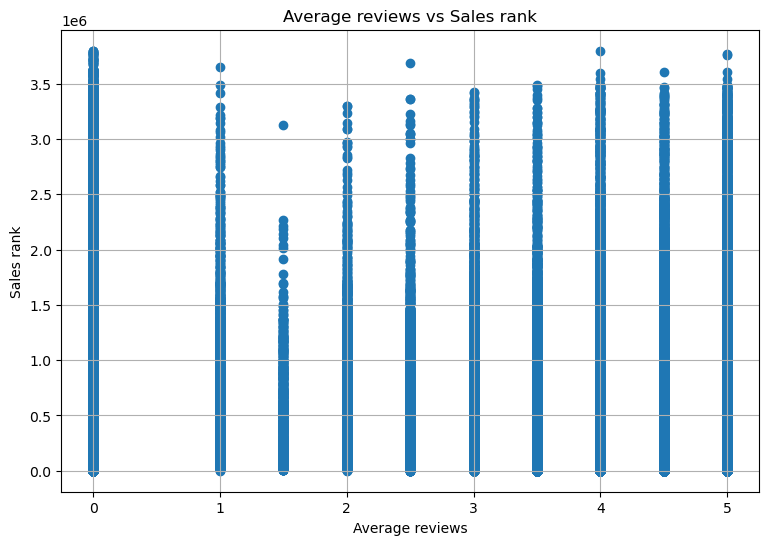

In [79]:
#Sales rank vs average rating per group:
#Is there a relationship between a group's average rating and its average sales rank?
#Do groups with higher average ratings tend to have better sales ranks?

data['avgReviewProducts'] = data.groupby('Id')['reviews_avg_rating'].transform('sum') 

plt.figure(figsize=(9, 6))
plt.scatter(data['avgReviewProducts'], data['salesrank'])
plt.xlabel('Average reviews')
plt.ylabel('Sales rank')
plt.title('Average reviews vs Sales rank')
plt.grid(True)
plt.show()

In [7]:
#prediction models 

#KNN Model 80%


# Extract features (average rating) and target variable (category)
X = data['reviews_avg_rating'].values.reshape(-1, 1)  # Reshape for KNN
y = data['group'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the KNN model with k=3 neighbors (you can experiment with different k values)
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Predict category labels for the test data
y_pred = knn_model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("KNN Model Accuracy:", accuracy)   





KNN Model Accuracy: 0.7251812745883892


In [3]:
#Decision trees

# Extract features (average rating) and target variable (category)
X = data['reviews_avg_rating'].values.reshape(-1, 1)  # Reshape for KNN
y = data['group'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

decision_tree = DecisionTreeClassifier()

# Train the model on the training data
decision_tree.fit(X_train, y_train)

# Predict category labels for the test data
y_pred = decision_tree.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Model Accuracy:", accuracy)




Decision Tree Model Accuracy: 0.7257834921892635


[Text(0.4444444444444444, 0.9375, 'x[0] <= 3.75\ngini = 0.435\nsamples = 325609\nvalue = [236011, 3, 11893, 61992, 2, 1, 3, 15704]'),
 Text(0.2222222222222222, 0.8125, 'x[0] <= 0.5\ngini = 0.357\nsamples = 125821\nvalue = [99222, 2, 4500, 16658, 0, 0, 1, 5438]'),
 Text(0.1111111111111111, 0.6875, 'gini = 0.302\nsamples = 83857\nvalue = [69013, 1, 835, 11696, 0, 0, 0, 2312]'),
 Text(0.3333333333333333, 0.6875, 'x[0] <= 3.25\ngini = 0.455\nsamples = 41964\nvalue = [30209, 1, 3665, 4962, 0, 0, 1, 3126]'),
 Text(0.2222222222222222, 0.5625, 'x[0] <= 1.25\ngini = 0.445\nsamples = 21360\nvalue = [15541, 1, 1956, 2346, 0, 0, 1, 1515]'),
 Text(0.1111111111111111, 0.4375, 'gini = 0.449\nsamples = 1670\nvalue = [1205, 0, 105, 242, 0, 0, 0, 118]'),
 Text(0.3333333333333333, 0.4375, 'x[0] <= 1.75\ngini = 0.445\nsamples = 19690\nvalue = [14336, 1, 1851, 2104, 0, 0, 1, 1397]'),
 Text(0.2222222222222222, 0.3125, 'gini = 0.538\nsamples = 508\nvalue = [329, 0, 73, 58, 0, 0, 0, 48]'),
 Text(0.44444444444

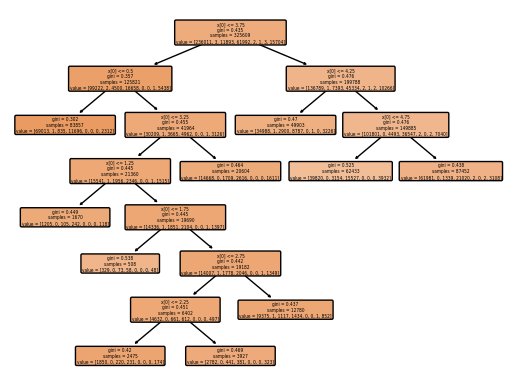

In [4]:
#plotting a visual of the decision tree graph
plot_tree(decision_tree, filled=True, rounded=True)

In [ ]:
group_average_rating = data.groupby('group')['reviews_avg_rating'].mean()
print(group_average_rating)

In [ ]:
MusicAvg = 3.6
DVDAvg = 3.7
VideoAvg = 3.6
BookAvg = 3.1


In [ ]:
#bar graph
categories = ['Music', 'DVD', 'Video', 'Book']
Review_categories = [MusicAvg, DVDAvg, VideoAvg, BookAvg]

colors = [(68/255, 69/255, 69/255), (0.8078, 0.6706, 0.6941), (197/255, 224/255, 216/255), (201/255, 201/255, 201/255)]
plt.bar(categories, Review_categories, color=colors) #colours converted to rgb instead


plt.xlabel('Product Category')
plt.ylabel('Average number of Reviews')
plt.title('Average Reviews by product category')

In [ ]:

# Extract features and target variable
X = data['reviews_avg_rating'].values.reshape(-1, 1)  # Feature
y = data['group'].values  # Target variable (categorical)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X.shape)  # Print the shape of features 
# Define the classification model (e.g., SVM)
model = SVC()  # Replace with chosen model

print(model)  # Print details about the SVC model

# Train the model
model.fit(X_train, y_train)

# Predict category labels for the test data
y_pred = model.predict(X_test)

# two params - y_test and Y_prediction are compared
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
